<a href="https://colab.research.google.com/github/Rikupro-creator/Bike_classification/blob/main/project_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0"
!pip install autogluon --no-cache-dir
#Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [ ]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /home/sagemaker-user/nd009t-c1-intro-to-ml-project-starter


In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /home/sagemaker-user/.kaggle
!touch /home/sagemaker-user/kaggle/kaggle.json
!chmod 600 /home/sagemaker-user/.kaggle/kaggle.json

touch: cannot touch '/home/sagemaker-user/kaggle/kaggle.json': No such file or directory


In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "rikufootballcorner"
kaggle_key = "e35c61a390a2701c572b54e17ed143ef"

# Save API token the kaggle.json file
with open("/home/sagemaker-user/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
! pip install kaggle

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor, TabularDataset

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv(
    'train.csv',
parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
train.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv(
    'test.csv',
    parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv(
    'sampleSubmission.csv',
    parse_dates=['datetime'])

submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
train.drop(['casual', 'registered'], axis=1, inplace=True)

In [ ]:
X=train.drop('count', axis=1)
y=train.count

from sklearn.model_selection import train_test_split
train_data, val_data=train_test_split(train, test_size=0.2, random_state=42)

In [ ]:
import os
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error',
                            problem_type='regression').fit(
    train_data,
    time_limit=600,
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240508_095819"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240508_095819"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   72.48 GB / 107.32 GB (67.5%)
Train Data Rows:    8708
Train Data Columns: 9
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data 

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -74.347557       3.383435  63.162645                0.001304           0.190204            3       True          8
1  RandomForestMSE_BAG_L2  -74.974994       2.639561  51.807524                1.126937          28.815522            2       True          6
2    ExtraTreesMSE_BAG_L2  -75.292020       2.255194  34.156919                0.742570          11.164917            2       True          7
3   KNeighborsDist_BAG_L1  -95.387166       0.075801   0.031889                0.075801           0.031889            1       True          2
4     WeightedEnsemble_L2  -95.387166       0.076539   0.301311                0.000738           0.269422            2       True          5
5   KNeighborsUnif_BAG_L1 -113.596269       0.071597   0.025814                0.07159

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.59626943439002,
  'KNeighborsDist_BAG_L1': -95.3871655282151,
  'RandomForestMSE_BAG_L1': -122.55836445188967,
  'ExtraTreesMSE_BAG_L1': -128.0914515939867,
  'WeightedEnsemble_L2': -95.3871655282151,
  'RandomForestMSE_BAG_L2': -74.97499446238055,
  'ExtraTreesMSE_BAG_L2': -75.29202015006628,
  'WeightedEnsemble_L3': -74.34755650478124},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  '

# evaluate the model on validation dataset

In [ ]:
import numpy as np

def rmsle(y_true, y_pred):
    """
    Calculate Root Mean Squared Logarithmic Error (RMSLE) between y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length mismatch between y_true and y_pred"

    # Convert inputs to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Clip negative values
    y_true = np.clip(y_true, 0, np.inf)
    y_pred = np.clip(y_pred, 0, np.inf)

    # Calculate RMSLE
    rmsle = np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))

    return rmsle


preds=predictor.predict(val_data.drop('count', axis=1))
preds
initial=rmsle(val_data['count'], preds)
initial


0.5517672434743615

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    27.677778
1    36.093246
2    38.080559
3    46.737610
4    51.554489
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
predictions[predictions < 0] = 0

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      127.578201
std       119.581429
min         3.951325
25%        26.543503
50%        80.263718
75%       207.368469
max       550.539307
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
#basing on the minimum value we have 64.2 which shows there are no negative values

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 690kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                         status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------------------  --------  -----------  ------------  
submission.csv               2024-05-08 09:59:46  first raw submission                                complete  1.79693      1.79693       
submission_new_hpo.csv       2024-05-08 09:48:30  new features with hyperparameters                   complete  0.49466      0.49466       
submission_new_features.csv  2024-05-08 09:34:49  new features                                        complete  0.54182      0.54182       
submission.csv               2024-05-08 09:33:09  first raw submission                                complete  1.79693      1.79693       
tail: write error: Broken pipe


#### Initial score of `1.84`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

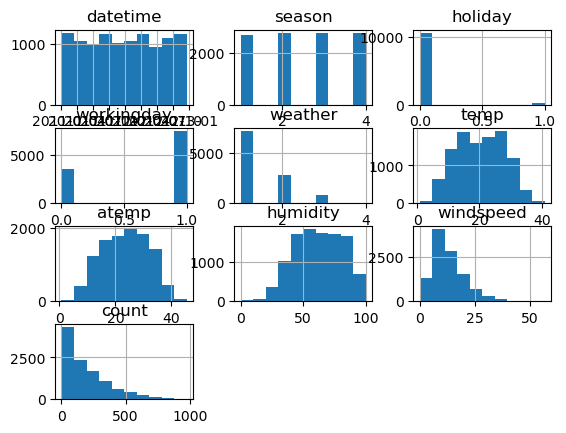

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist();

In [ ]:
! pip install seaborn

<Axes: >

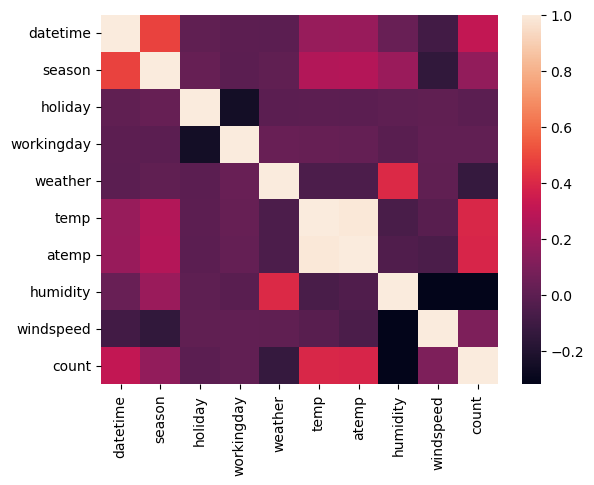

In [ ]:
import seaborn as sns
cr=train.corr()
sns.heatmap(cr)

In [ ]:
# create a new feature
import datetime as dt
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month

test ['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month

In [ ]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'hour', 'day', 'month'],
      dtype='object')

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1


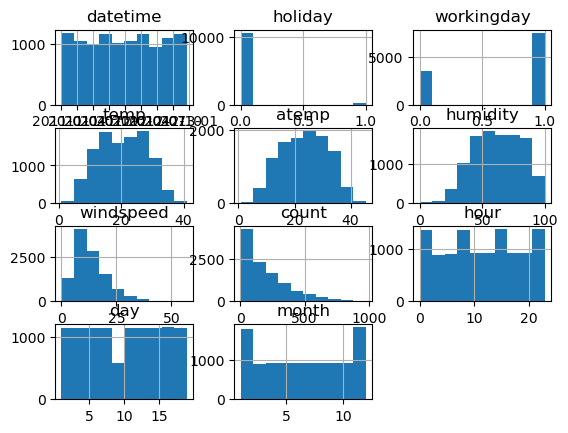

In [ ]:
# View histogram of all features again now with the hour feature
train.hist();

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
from sklearn.model_selection import train_test_split
train_data, val_data=train_test_split(train, test_size=0.2, random_state=42)

In [ ]:
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error',
                            problem_type='regression').fit(
    train_data,
    time_limit=600,
    presets='best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240508_100006"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240508_100006"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   71.43 GB / 107.32 GB (66.6%)
Train Data Rows:    8708
Train Data Columns: 12
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data

In [ ]:
predictor_new_features.fit_summary()

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -36.896456       2.840538  65.330816                0.000501           0.130993            3       True          8
1    ExtraTreesMSE_BAG_L2  -36.912811       2.159763  34.145429                0.580352           8.837761            2       True          7
2  RandomForestMSE_BAG_L2  -37.665580       2.259686  56.362063                0.680275          31.054394            2       True          6
3     WeightedEnsemble_L2  -38.881696       1.532246  25.572208                0.000672           0.286932            2       True          5
4  RandomForestMSE_BAG_L1  -39.959008       0.671607  17.201388                0.671607          17.201388            1       True          3
5    ExtraTreesMSE_BAG_L1  -40.724494       0.774000   8.061477                0.77400

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -113.59626943439002,
  'KNeighborsDist_BAG_L1': -95.3871655282151,
  'RandomForestMSE_BAG_L1': -39.959008201659245,
  'ExtraTreesMSE_BAG_L1': -40.72449395250865,
  'WeightedEnsemble_L2': -38.881696416326804,
  'RandomForestMSE_BAG_L2': -37.66557963814592,
  'ExtraTreesMSE_BAG_L2': -36.9128106836625,
  'WeightedEnsemble_L3': -36.89645640202181},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsUnif_BAG_L1'],
  'KNeighborsDist_BAG_L1': ['KNeighborsDist_BAG_L1'],
  

In [ ]:
# evaulate on validation

In [ ]:
preds=predictor_new_features.predict(val_data.drop('count', axis=1))
new_features=rmsle(val_data['count'], preds)
new_features

0.2990495732745983

In [ ]:
preds=predictor_new_features.predict(test)

In [ ]:
# Remember to set all negative values to zero
preds.describe()

count    6493.000000
mean      185.786392
std       164.580093
min         2.243916
25%        49.150105
50%       143.306198
75%       283.561951
max       910.177490
Name: count, dtype: float64

In [ ]:
predictions[predictions < 0] = 0

In [ ]:
# Same submitting predictions
submission_new_features=submission.copy()
submission_new_features["count"] = preds
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 658kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                         status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-05-08 10:01:29  new features                                        pending                              
submission.csv               2024-05-08 09:59:46  first raw submission                                complete  1.79693      1.79693       
submission_new_hpo.csv       2024-05-08 09:48:30  new features with hyperparameters                   complete  0.49466      0.49466       
submission_new_features.csv  2024-05-08 09:34:49  new features                                        complete  0.54182      0.54182       
tail: write error: Broken pipe


#### New Score of `0.6538`

Its an improvement of the model by more than half of the results.

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
from sklearn.model_selection import train_test_split
train_data, val_data=train_test_split(train, test_size=0.2, random_state=42)

In [ ]:
from autogluon.tabular import TabularPredictor
import pandas as pd



hyperparameter_tune_kwargs = {
    'searcher': 'random',
    'scheduler': 'local',
    'num_trials': 10,
    'num_folds': 2
}

predictor_new_hpo = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error',
    problem_type='regression'
)

hyperparameters = {
    'XGB': {
        'ag_args': {
            'num_boosting_rounds': 1000,
            'max_depth': 8
        }
    },
    'RF': {
        'ag_args': {
            'num_estimators': 300
        }
    }
}

predictor_new_hpo.fit(
    train_data=train_data,
    time_limit=3600,
    verbosity=2,
    num_bag_sets=1,
    num_stack_levels=1,
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)


No path specified. Models will be saved in: "AutogluonModels/ag-20240508_100131"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 3600s
AutoGluon will save models to "AutogluonModels/ag-20240508_100131"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   70.53 GB / 107.32 GB (65.7%)
Train Data Rows:    8708
Train Data Columns: 12
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
System error: Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 838, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 165, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 266, in _fit
    self._fit_folds(
  File "/opt/conda/lib/python3.10/site-pack

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
System error: Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 838, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 165, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 266, in _fit
    self._fit_folds(
  File "/opt/conda/lib/python3.10/site-pack

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  RandomForest_BAG_L1 -39.959008       0.000179  17.486387                0.000179          17.486387            1       True          1
1  WeightedEnsemble_L2 -39.959008       0.001443  17.491495                0.001264           0.005108            2       True          2
2  RandomForest_BAG_L2 -40.693968       0.000357  39.897965                0.000178          22.411578            2       True          3
3  WeightedEnsemble_L3 -40.693968       0.001038  39.904118                0.000681           0.006153            3       True          4
Number of models trained: 4
Types of models trained:
{'WeightedEnsembleModel', 'StackerEnsembleModel_RF'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)
Feature Metadata (Processed):
(raw dtype, special 

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'RandomForest_BAG_L1': -39.959008201659245,
  'WeightedEnsemble_L2': -39.959008201659245,
  'RandomForest_BAG_L2': -40.69396754341919,
  'WeightedEnsemble_L3': -40.69396754341919},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'RandomForest_BAG_L1': ['RandomForest_BAG_L1'],
  'WeightedEnsemble_L2': ['WeightedEnsemble_L2'],
  'RandomForest_BAG_L2': ['RandomForest_BAG_L2'],
  'WeightedEnsemble_L3': ['WeightedEnsemble_L3']},
 'model_fit_times': {'RandomForest_BAG_L1': 17.48638653755188,
  'WeightedEnsemble_L2': 0.005108356475830078,
  'RandomForest_BAG_L2': 22.41157841682434,
  'WeightedEnsemble_L3': 0.006153106689453125},
 'model_pred_times': {'RandomForest_BAG_L1': 0.00017905235290527344,
  'WeightedEnsemble_L2': 0.0012640953063964844,
  '

In [ ]:
preds=predictor_new_hpo.predict(val_data.drop('count', axis=1))
new_hpo=rmsle(val_data['count'], preds)

In [ ]:
preds=predictor_new_hpo.predict(val_data.drop('count', axis=1))
rmsle(val_data['count'], preds)

0.3255202748379288

In [ ]:
# Remember to set all negative values to zero
preds_hpo=predictor_new_hpo.predict(test)

In [ ]:
preds_hpo[preds_hpo < 0] = 0

In [ ]:
# Same submitting predictions
submission_new_hpo=submission.copy()
submission_new_hpo["count"] = preds_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 182k/182k [00:00<00:00, 606kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                         status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-08 10:03:18  new features with hyperparameters                   complete  0.49466      0.49466       
submission_new_hpo.csv       2024-05-08 10:02:17  new features with hyperparameters                   complete  0.49466      0.49466       
submission_new_features.csv  2024-05-08 10:01:29  new features                                        complete  0.54182      0.54182       
submission.csv               2024-05-08 09:59:46  first raw submission                                complete  1.79693      1.79693       
tail: write error: Broken pipe


#### New Score of `0.49466`

Hurray! hyperparameter tuning works. We have improved the models performance signifincantly. Note that we are using the dataset with new features. it implies that feature engineering and hyperparameter tuning are very important for a model.

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

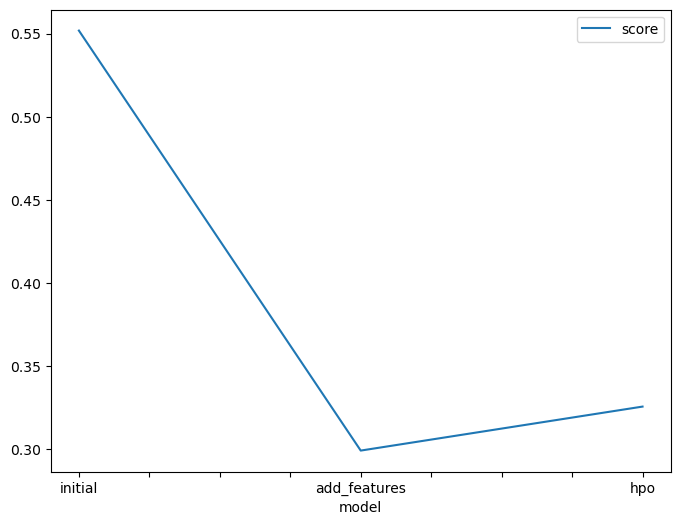

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [initial, new_features, new_hpo]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

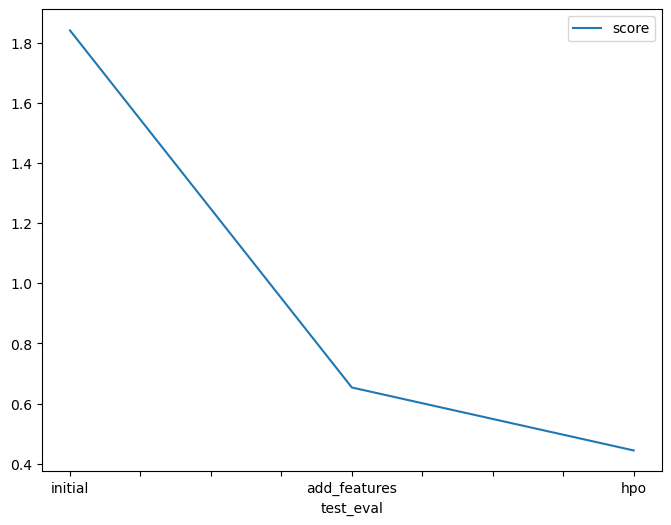

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.84007, 0.6538, 0.44464]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

# Testing different hyperparameters

In [ ]:
import autogluon as ag
from autogluon.tabular import TabularPredictor

# Create a TabularPredictor
predictor_new_hpo1 = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error',
    problem_type='regression'
)

hyperparameter_tune_kwargs = {
    'searcher': 'random',
     'scheduler': 'local',
    'num_trials': 10,  # Number of hyperparameter combinations to try
    'num_folds':2  # Number of folds for cross-validation
}
# Define the hyperparameter search space
hyperparameters = {
    'XGB': {
        'ag_args_fit': {
            'num_boosting_rounds': ag.common.space.Categorical(100, 500, 1000),
            'max_depth': ag.common.space.Categorical(3, 5, 8),
            'eta': ag.common.space.Categorical(0.01, 0.05, 0.1),  # Learning rate
            'min_child_weight': ag.common.space.Categorical(1, 3, 5),
            'gamma': ag.common.space.Categorical(0, 0.1, 0.2),  # Minimum loss reduction
            'subsample': ag.common.space.Categorical(0.5, 0.7, 1.0),  # Row subsampling
            'colsample_bytree': ag.common.space.Categorical(0.5, 0.7, 1.0)  # Column subsampling
        },

}
}
# Train models with hyperparameter tuning
predictor_new_hpo1.fit(
    train_data=train_data,
    time_limit=600,
    verbosity=2,
    num_bag_sets=1,
    num_stack_levels=1,
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240508_100333"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240508_100333"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   70.08 GB / 107.32 GB (65.3%)
Train Data Rows:    8708
Train Data Columns: 12
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data 

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
System error: Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 838, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 165, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 266, in _fit
    self._fit_folds(
  File "/opt/conda/lib/python3.10/site-pack

ValueError: AutoGluon did not successfully train any models

In [ ]:
preds=predictor_new_hpo1.predict(val_data.drop('count', axis=1))
new_hpo1=rmsle(val_data['count'], preds)
new_hpo1

In [ ]:
preds_hpo1=predictor_new_hpo1.predict(test)
preds_hpo1[preds_hpo1 < 0] = 0
# create a submission file
# Same submitting predictions
submission_new_hpo1=submission.copy()
submission_new_hpo1["count"] = preds_hpo1
submission_new_hpo1.to_csv("submission_new_hpo1.csv", index=False)

AssertionError: Trainer has no fit models that can infer.

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters and standardized"

100%|█████████████████████████████████████████| 182k/182k [00:00<00:00, 664kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                                         status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-05-08 10:04:09  new features with hyperparameters and standardized  complete  0.49466      0.49466       
submission_new_hpo.csv       2024-05-08 10:03:18  new features with hyperparameters                   complete  0.49466      0.49466       
submission_new_hpo.csv       2024-05-08 10:02:17  new features with hyperparameters                   complete  0.49466      0.49466       
submission_new_features.csv  2024-05-08 10:01:29  new features                                        complete  0.54182      0.54182       
tail: write error: Broken pipe


# lets add more features
   (1) Feature that categorizes morning, lunch, and evening rush hour, 7-9am, 11am-1pm, and 5-6pm.
   
   (2) Feature that categorizes hot/cold/mild temps from temp.
   
    (3)Feature that categories very windy/mild wind.
    
    (4)Feature that categories very humid/ not humid.

In [ ]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'hour', 'day', 'month'],
      dtype='object')

In [ ]:
# features that categorize time
def categorize_rush_hour(datetime_val):
    hour = datetime_val.hour
    if 7 <= hour < 9:
        return 'morning'
    elif 11 <= hour < 13:
        return 'lunch'
    elif hour in [17, 18]:
        return 'evening'
    else:
        return 'other'

# Assuming your datetime column is named 'datetime_col'
train['time_category'] = train['datetime'].apply(categorize_rush_hour)
test['time_category'] = test['datetime'].apply(categorize_rush_hour)

In [ ]:
def categorize_temp(temp):
    if temp >= 30:
        return 'hot'
    elif temp < 20:
        return 'cold'
    else:
        return 'mild'

train['temp_category'] = train['atemp'].apply(categorize_temp)
test['temp_category'] = test['atemp'].apply(categorize_temp)

In [ ]:
def categorize_wind(wind_speed):
    if wind_speed >= 20:
        return 'very windy'
    else:
        return 'mild wind'

# Assuming your wind speed column is named 'wind_speed_col'
train['wind_category'] = train['windspeed'].apply(categorize_wind)
test['wind_category'] = test['windspeed'].apply(categorize_wind)

In [ ]:
def categorize_humidity(humidity):
    if humidity >= 70:
        return 'very humid'
    else:
        return 'not humid'

# Assuming your humidity column is named 'humidity_col'
train['humidity_category'] = train['humidity'].apply(categorize_humidity)
test['humidity_category'] = test['humidity'].apply(categorize_humidity)



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           10886 non-null  datetime64[ns]
 1   season             10886 non-null  category      
 2   holiday            10886 non-null  int64         
 3   workingday         10886 non-null  int64         
 4   weather            10886 non-null  category      
 5   temp               10886 non-null  float64       
 6   atemp              10886 non-null  float64       
 7   humidity           10886 non-null  int64         
 8   windspeed          10886 non-null  float64       
 9   count              10886 non-null  int64         
 10  hour               10886 non-null  int32         
 11  day                10886 non-null  int32         
 12  month              10886 non-null  int32         
 13  time_category      10886 non-null  object        
 14  temp_c

In [ ]:
# the columns that  we have added are categorical in nature
train['temp_category']=pd.Categorical(train['temp_category']).codes
train['time_category']=pd.Categorical(train['time_category']).codes
train['wind_category']=pd.Categorical(train['wind_category']).codes
train['humidity_category']=pd.Categorical(train['humidity_category']).codes


test['temp_category']=pd.Categorical(test['temp_category']).codes
test['time_category']=pd.Categorical(test['time_category']).codes
test['wind_category']=pd.Categorical(test['wind_category']).codes
test['humidity_category']=pd.Categorical(test['humidity_category']).codes


In [ ]:
from sklearn.model_selection import train_test_split
train_data, val_data=train_test_split(train, test_size=0.2, random_state=42)

In [ ]:
import autogluon as ag
from autogluon.tabular import TabularPredictor

# Create a TabularPredictor
predictor_new_hpo2 = TabularPredictor(
    label='count',
    eval_metric='root_mean_squared_error',
    problem_type='regression'
)


# Define the hyperparameter search space
hyperparameters = {
    'XGB': {
        'ag_args_fit': {
            'num_boosting_rounds': ag.common.space.Categorical(100, 500, 1000),
            'max_depth': ag.common.space.Categorical(3, 5, 8),
            'eta': ag.common.space.Categorical(0.01, 0.05, 0.1),  # Learning rate
            'min_child_weight': ag.common.space.Categorical(1, 3, 5),
            'gamma': ag.common.space.Categorical(0, 0.1, 0.2),  # Minimum loss reduction
            'subsample': ag.common.space.Categorical(0.5, 0.7, 1.0),  # Row subsampling
            'colsample_bytree': ag.common.space.Categorical(0.5, 0.7, 1.0)  # Column subsampling
        },
        'ag_args_ensemble': {
            'num_bag_folds': ag.common.space.Categorical(5, 10, 15)
        }
    },
    'RF': {
        'ag_args_fit': {
            'num_estimators': ag.common.space.Categorical(100, 200, 300),
            'max_depth': ag.common.space.Categorical(5, 10, None),  # None means no limit
            'min_samples_split': ag.common.space.Categorical(2, 5, 10),
            'min_samples_leaf': ag.common.space.Categorical(1, 2, 4),
            'max_features': ag.common.space.Categorical('sqrt', 'log2', None)  # sqrt or log2 of num_features
        },
        'ag_args_ensemble': {
            'num_bag_folds': ag.common.space.Categorical(5, 10, 15)
        }
    }
}

# Train models with hyperparameter tuning
predictor_new_hpo2.fit(
    train_data=train_data,
    time_limit=7200,
    verbosity=2,
    num_bag_sets=1,
    num_stack_levels=1,
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240508_100440"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 7200s
AutoGluon will save models to "AutogluonModels/ag-20240508_100440"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   70.08 GB / 107.32 GB (65.3%)
Train Data Rows:    8708
Train Data Columns: 16
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):  # treat None, NaN, INF, NINF as NA
Using Feature Generators to preprocess the data

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
System error: Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 838, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 165, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 266, in _fit
    self._fit_folds(
  File "/opt/conda/lib/python3.10/site-pack

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
System error: Broken pipe
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 37, in model_trial
    model = fit_and_save_model(
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/model_trial.py", line 96, in fit_and_save_model
    model.fit(**fit_args, time_limit=time_left)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 838, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 165, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 266, in _fit
    self._fit_folds(
  File "/opt/conda/lib/python3.10/site-pack

In [ ]:
preds=predictor_new_hpo2.predict(val_data.drop('count', axis=1))
new_hpo2=rmsle(val_data['count'], preds)
new_hpo2

0.3302593126328112

In [ ]:
preds_hpo2=predictor_new_hpo2.predict(test)
preds[preds < 0] = 0
# create a submission file
# Same submitting predictions
submission_new_hpo2=submission.copy()
submission_new_hpo2["count"] = preds_hpo2
submission_new_hpo2.to_csv("submission_new_hpo1.csv", index=False)

NameError: name 'preds_hpo1' is not defined

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo1.csv -m "new features with hyperparameters improved version"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

In [ ]:
# makes the model perform worse

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['No', 'yes', 'hpo0'],
    "hpo2": ['No', 'yes', 'hpo1'],
    "hpo3": ['No', 'yes', 'hpo2'],
    "score": [0.48864, 0.48864,0.4899 ]
})